In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path of data 
path = 'automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# 1. Linear Regression and Multiple Linear Regression

One example of a Data Model that we will be using is:

Simple Linear Regression
Simple Linear Regression is a method to help us understand the relationship between two variables:

The predictor/independent variable (X)
The response/dependent variable (that we want to predict)(Y)
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑋:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠
Linear Function
𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋
a refers to the intercept of the regression line, in other words: the value of Y when X is 0
b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit
Let's load the modules for linear regression:

In [3]:
#loading the module for LR
from sklearn.linear_model import LinearRegression

In [4]:
#creating LR object
lr=LinearRegression()
lr

LinearRegression()

In [6]:
#How could highway-mpg help us predict car price?
x=df[['highway-mpg']]
y=df[['price']]
type(x)
type(y)

pandas.core.frame.DataFrame

In [7]:
#fitting linear model using x and y
lr.fit(x,y) #training. predicts what is going to be intercept and slope

LinearRegression()

In [8]:
yhat=lr.predict([[25]])
yhat

C:\Users\Guest1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[17879.97140011]])

In [9]:
#value of intercept (a)
lr.intercept_

array([38423.30585816])

In [10]:
#value of coefficient (b)
lr.coef_

array([[-821.73337832]])

In [11]:
# yhat=a + bx
# price = 38423.31 - 821.73*('highway-mpg')

 
#Creating a linear regression object called "lr1".

In [6]:
 
lr1 = LinearRegression()
lr1

LinearRegression()

Question #1 b): 
Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [7]:

X = df[['engine-size']]
Y = df[['price']]
lr1.fit(X,Y)

LinearRegression()


Finding the slope and intercept of the model:

slope:

In [9]:
lr1.coef_

array([[166.86001569]])

intercept:

In [10]:
lr1.intercept_

array([-7963.33890628])


The equation of the predicted line is shown below:

In [11]:
# Yhat = a + bX
# Yhat = -7963.34 + 166.86X
Price = 166.86*df['engine-size'] - 7963.34
Price

0      13728.46
1      13728.46
2      17399.38
3      10224.40
4      14729.62
         ...   
196    15563.92
197    15563.92
198    20903.44
199    16231.36
200    15563.92
Name: engine-size, Length: 201, dtype: float64

Multiple Linear Regression
What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑋_1:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1𝑋_2:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2𝑋_3:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3𝑋_4:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4
𝑎:𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡𝑏_1:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1𝑏_2:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2𝑏_3:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3𝑏_4:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4
The equation is given by:

𝑌ℎ𝑎𝑡=𝑎+𝑏_1𝑋_1+𝑏_2𝑋_2+𝑏_3𝑋_3+𝑏_4𝑋_4
From the previous section we know that other good predictors of price could be:

Horsepower,
Curb-weight,
Engine-size,
Highway-mpg,

Let's develop a model using these variables as the predictor variables.

In [17]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df[['price']]

In [18]:
lr2 = LinearRegression()
lr2

LinearRegression()

In [19]:
lr2.fit(X,Y)

LinearRegression()

In [20]:
lr2.intercept_

array([-15806.62462633])

In [21]:
lr2.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

In [22]:
Price = 53.50*df['horsepower'] + 4.71*df['curb-weight'] + 81.53*df['engine-size'] + 36.06*df['highway-mpg'] - 15,806.62
Price

(0      29497.10
 1      29497.10
 2      34850.45
 3      26417.84
 4      31319.94
          ...   
 196    32493.33
 197    35303.02
 198    36274.59
 199    33603.54
 200    32903.25
 Length: 201, dtype: float64,
 806.62)


Below we will create and train a Multiple Linear Regression model, lr3, where the response variable is "price", and the predictor variables are "normalized-losses" and "highway-mpg".

In [23]:
lr3=LinearRegression()
lr3

LinearRegression()

In [24]:
# Yhat = a + b1*df['normalized-losses'] + b2*df['highway-mpg']
Y = df[['price']]
X = df[['normalized-losses', 'highway-mpg']]
lr3.fit(X,Y)

LinearRegression()

In [25]:
lr3.intercept_

array([38201.31327246])

In [26]:
lr3.coef_

array([[   1.49789586, -820.45434016]])

In [27]:
Price = 38201.31 + 1.50*df['normalized-losses'] - 820.45*df['highway-mpg']
Price

0      16232.16
1      16232.16
2      17052.61
3      13833.81
4      20397.41
         ...   
196    15371.21
197    17832.56
198    19473.46
199    16191.66
200    17832.56
Length: 201, dtype: float64

2. Model Evaluation Using Visualization
Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

Import the visualization package, seaborn:

In [28]:
import seaborn as sns
%matplotlib inline

Regression Plot

When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

Let's visualize highway-mpg as potential predictor variable of price:

(0.0, 48164.462252006226)

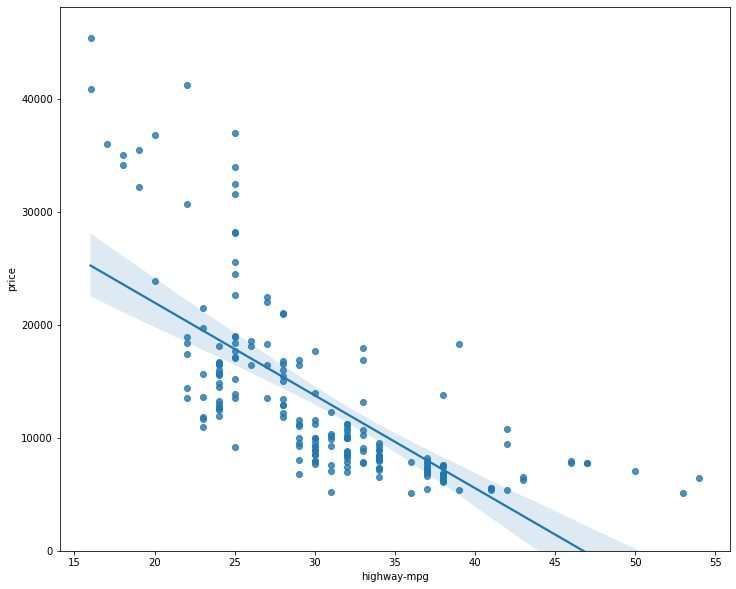

In [29]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)


We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.


Now, we will compare this plot to the regression plot of "peak-rpm" and explain the difference.

In [30]:
lr4=LinearRegression()
lr4

LinearRegression()

In [31]:
x=df[['peak-rpm']]
y=df['price']
lr4.fit(x,y)

LinearRegression()

In [32]:
lr4.intercept_


21851.014686139806

In [33]:
lr4.coef_

array([-1.68902902])

In [34]:
price = 21851.01 -1.69*df['peak-rpm']


(0.0, 47414.1)

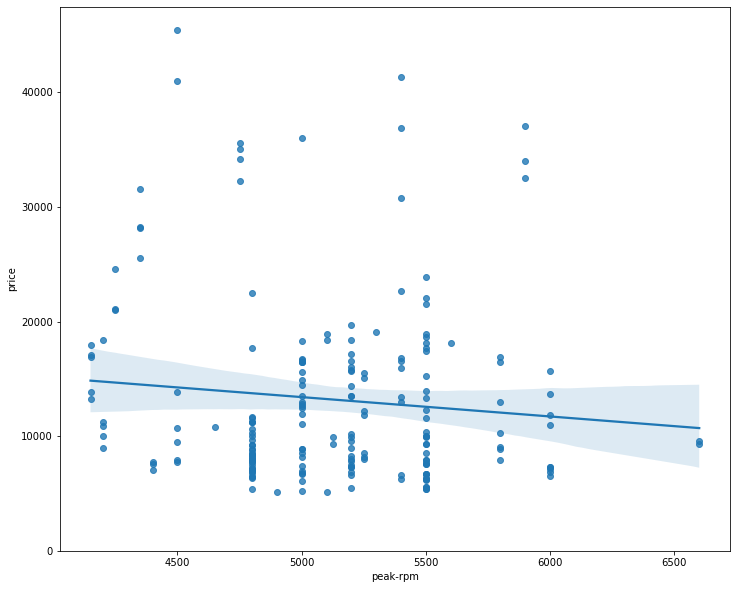

In [84]:
plt.figure(figsize=(12,10))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

In [ ]:
#Explaining the difference:

price = 38,423.31 - 821.73*df['highway-mpg']
price = 21851.01 - 1.69*df['peak-rpm']

# Point 1: The coefficients of both equations are negative. This implies the relationship between the two variables (X and Y)
# is negative. When one increases, the other decreases, and vice-versa.

# Point 2: The slope of highway-mpg/price equation is steeper than that of peak-rpm/price equation.
# This implies that a change in the predictor variable (highway-mpg) will lead to a higher change
# in the response variable (price) than in the case of the peak-rpm/price equation. 

# Point 3: Looking at the scatterplots, more plots seem to be further away from the peak-rpm regression line
# than in the case of highway-mpg   

